**Author -: Manav Garg**





**Intenship company-: The Spark Foundation**

**Task id -: 5**

**Task -: Exploratory Data Analysis : Sports (Indian Premier League)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Fetching data

In [24]:
matches_data = pd.read_csv('/content/drive/MyDrive/Internship-Projects/GRIP(Exploratory Data Analysis on IP)L/data/matches.csv')
deliveries_data = pd.read_csv('/content/drive/MyDrive/Internship-Projects/GRIP(Exploratory Data Analysis on IP)L/data/deliveries.csv')

In [ ]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
deliveries_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

Analytics on matches played per season

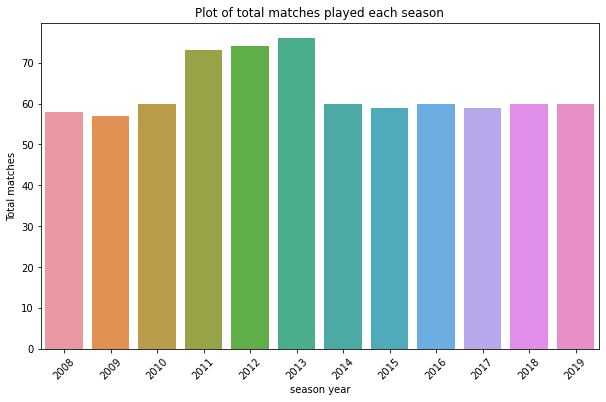

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='season',data=matches_data)
plt.title("Plot of total matches played each season")
plt.xticks(rotation=45)
plt.xlabel("season year")
plt.ylabel("Total matches")
plt.show()

Most Sucessful Teams

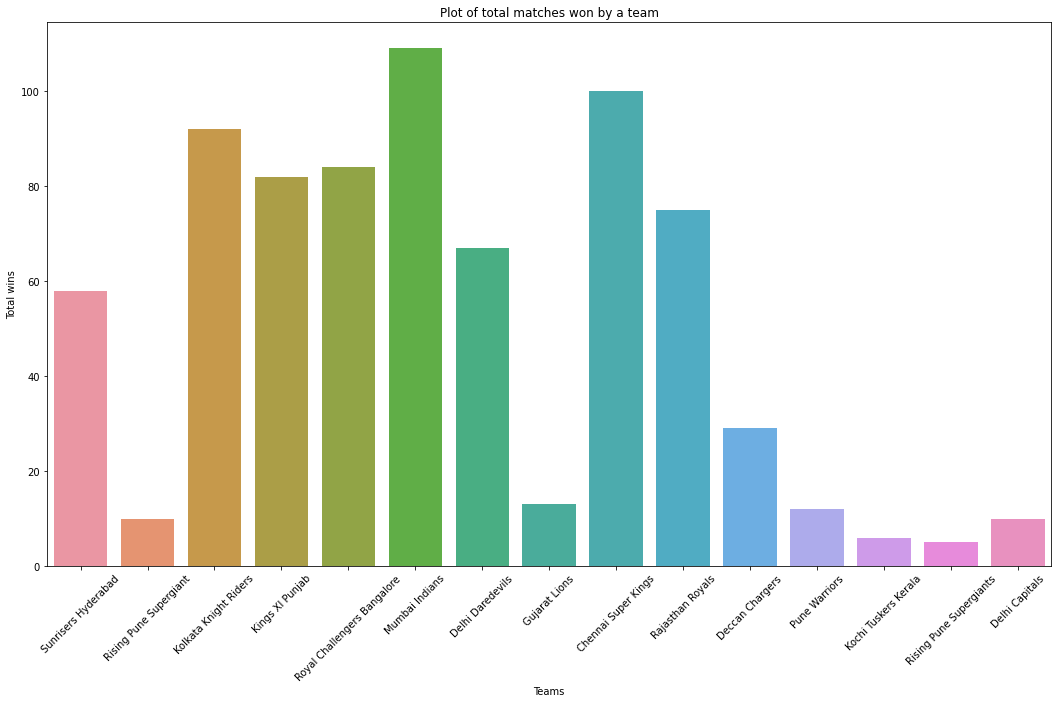

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='winner',data=matches_data)
plt.title("Plot of total matches won by a team")
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Total wins")
plt.show()

Team who won the ipl most

In [ ]:
all_final_matches_idx = list(np.array(matches_data.groupby('season')['id'].max()))

In [ ]:
final_matches_data=matches_data[matches_data['id'].isin(all_final_matches_idx)]

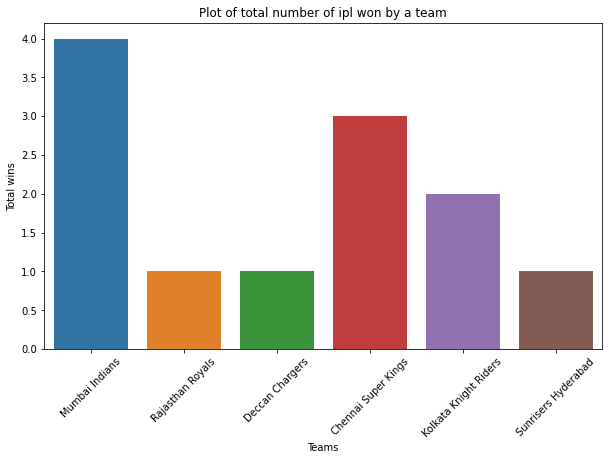

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='winner',data=final_matches_data)
plt.title("Plot of total number of ipl won by a team")
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Total wins")
plt.show()

Most Runs

In [ ]:
batsman_score=deliveries_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman total runs'})
print("Top 10 Leading Run Scorer in IPL")
batsman_score.iloc[:10,:]

Top 10 Leading Run Scorer in IPL


,batsman,batsman total runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


Most fours and sixes

In [ ]:
batsman_four = deliveries_data[deliveries_data['batsman_runs']==4]

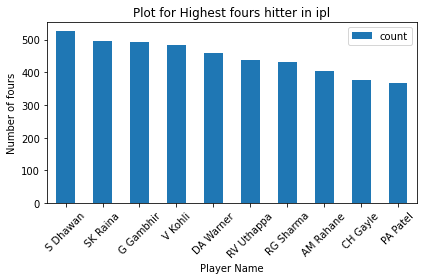

In [ ]:
ax=(batsman_four.groupby('batsman')['batsman_runs'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True))[:10].plot('batsman','count',kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Number of fours')
plt.xticks(rotation=45)
plt.title("Plot for Highest fours hitter in ipl")
plt.tight_layout()

In [ ]:
batsman_six= deliveries_data[deliveries_data['batsman_runs']==6]

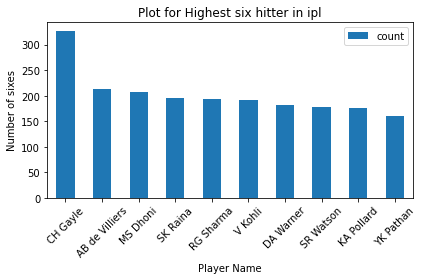

In [ ]:
ax=(batsman_six.groupby('batsman')['batsman_runs'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True))[:10].plot('batsman','count',kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Number of sixes')
plt.xticks(rotation=45)
plt.title("Plot for Highest six hitter in ipl")
plt.tight_layout()

player with the greatest contribution in match winning

In [ ]:
player_data =  matches_data['player_of_match'].value_counts()
values =  player_data.to_list()[:10]
index =  player_data.index.to_list()[:10]

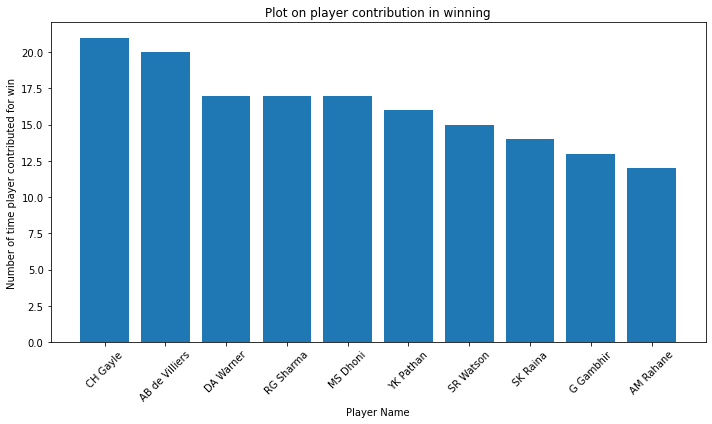

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(index,values)
plt.xticks(rotation=45)
plt.xlabel('Player Name')
plt.ylabel('Number of time player contributed for win')
plt.title('Plot on player contribution in winning')
plt.tight_layout()

Highest Wicket taker

In [ ]:
dismissal_kind_for_bowler = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

In [ ]:
def bowler_wkt(x):
  if x in dismissal_kind_for_bowler:
    return 1
  else:
    return 0

In [ ]:
deliveries_data['is_bowler_wkt'] = deliveries_data['dismissal_kind'].apply(bowler_wkt)

In [ ]:
deliveries_data['is_bowler_wkt'].tail()

179073    0
179074    0
179075    0
179076    0
179077    1
Name: is_bowler_wkt, dtype: int64

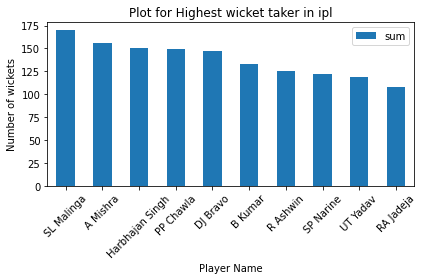

In [ ]:
ax=(deliveries_data.groupby('bowler')['is_bowler_wkt'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True))[:10].plot('bowler','sum',kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Number of wickets')
plt.xticks(rotation=45)
plt.title("Plot for Highest wicket taker in ipl")
plt.tight_layout()

Analytics on dismissal

In [ ]:
labels=(deliveries_data['dismissal_kind'].value_counts().index.tolist())
values = np.array(deliveries_data['dismissal_kind'].value_counts())


In [ ]:
porcent = 100.*values/sum(values)
print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


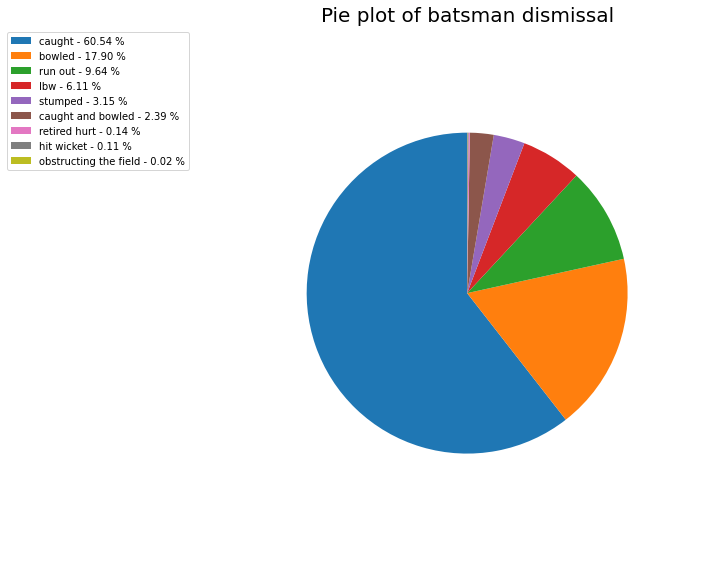

In [ ]:
plt.figure(figsize = (10,8))
patches,texts=plt.pie(values,startangle=90)
plt.title('Pie plot of batsman dismissal',fontsize=20)
plt.axis('equal',fontsize=10)
porcent = 100.*values/sum(values)
patches, labels, dummy =  zip(*sorted(zip(patches, labels, values),key=lambda x: x[2],reverse=True))
labels= ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]
plt.legend(patches, labels,loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)
plt.tight_layout()

Toss importance for wining

In [ ]:
toss_winner_data = matches_data[['id','toss_winner', 'winner',]]

In [ ]:
toss_winner_data['match_win_by_toss'] =  (toss_winner_data['toss_winner'] == toss_winner_data['winner'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  import sys


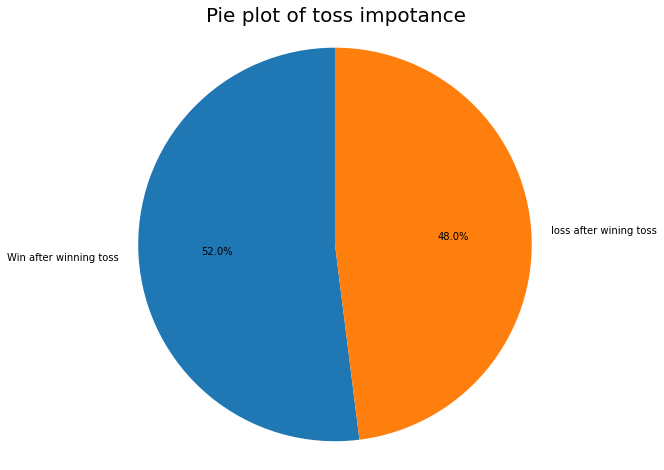

In [ ]:
toss_win=toss_winner_data['match_win_by_toss'].value_counts()
labels=['Win after winning toss','loss after wining toss']
bar_sizes = toss_win.values
plt.figure(figsize = (10,8))
plt.pie(bar_sizes, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Pie plot of toss impotance',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

Analytics on toss decision

In [ ]:
labels=(matches_data['toss_decision'].value_counts().index.tolist())
values = np.array(matches_data['toss_decision'].value_counts())
for count,label in enumerate(labels):
  labels[count] += ' first'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  after removing the cwd from sys.path.


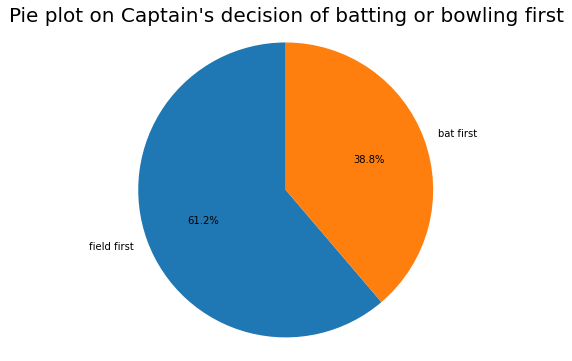

In [ ]:
plt.figure(figsize = (10,6))
plt.pie(values, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Pie plot on Captain\'s decision of batting or bowling first',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

Analytics on impact of batting or bowling first on winning

In [ ]:
matches_data['win_by']=np.where(matches_data['win_by_runs']>0,'Bat_first_win%','Bowl_first_win%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  import sys


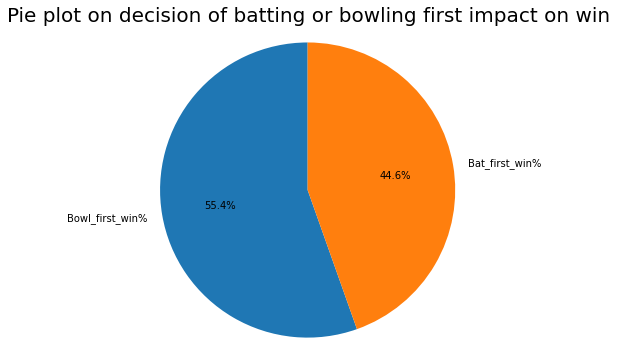

In [ ]:
Win=matches_data['win_by'].value_counts()
labels=np.array(Win.index)
sizes = Win.values 
plt.figure(figsize = (10,6))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Pie plot on decision of batting or bowling first impact on win',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


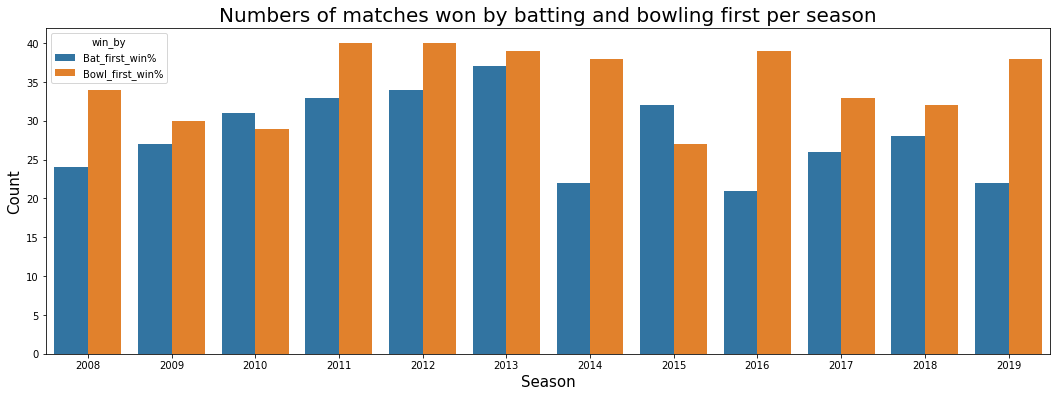

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot('season',hue='win_by',data=matches_data)
plt.title("Numbers of matches won by batting and bowling first per season",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

Analytics on impact of toss winning in ipl finals

In [ ]:
final_matches_data['match_win_by_toss']= (final_matches_data['toss_winner'] == final_matches_data['winner'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  import sys


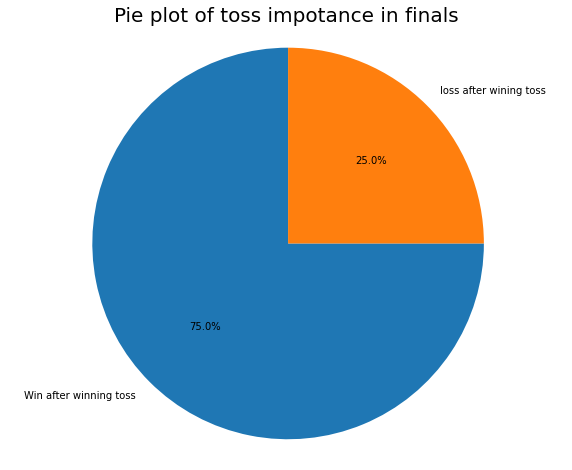

In [ ]:
toss_win=final_matches_data['match_win_by_toss'].value_counts()
labels=['Win after winning toss','loss after wining toss']
bar_sizes = toss_win.values
plt.figure(figsize = (10,8))
plt.pie(bar_sizes, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Pie plot of toss impotance in finals',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

Analytics on whether batting or bowling first in ipl final leads to win

In [ ]:
final_matches_data['win_by']= final_matches_data['win_by_wickets'] > 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final_matches_data['win_by']

58     False
116     True
173    False
233    False
306    False
380     True
456    False
516     True
575    False
635    False
695     True
755    False
Name: win_by, dtype: bool

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if sys.path[0] == '':


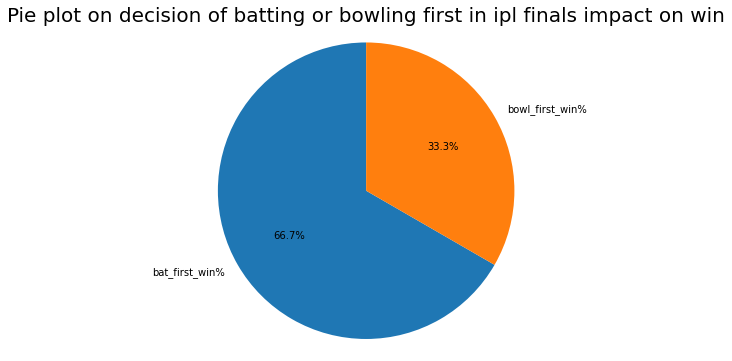

In [ ]:
Win=final_matches_data['win_by'].value_counts()
labels=Win.index.tolist()
for count,label in enumerate(labels):
  if label:
    labels[count] = 'bowl_first_win%'
  else:
    labels[count] = 'bat_first_win%'
sizes = Win.values 
plt.figure(figsize = (10,6))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Pie plot on decision of batting or bowling first in ipl finals impact on win',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

Analytics Regarding City and Venue of the match played

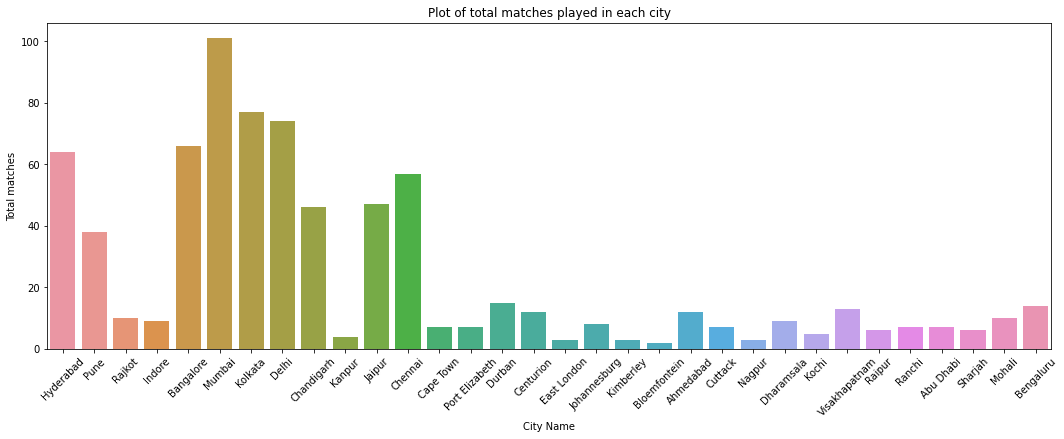

In [5]:
plt.figure(figsize=(18,6))
sns.countplot(x='city',data=matches_data)
plt.title("Plot of total matches played in each city")
plt.xticks(rotation=45)
plt.xlabel("City Name")
plt.ylabel("Total matches")
plt.show()

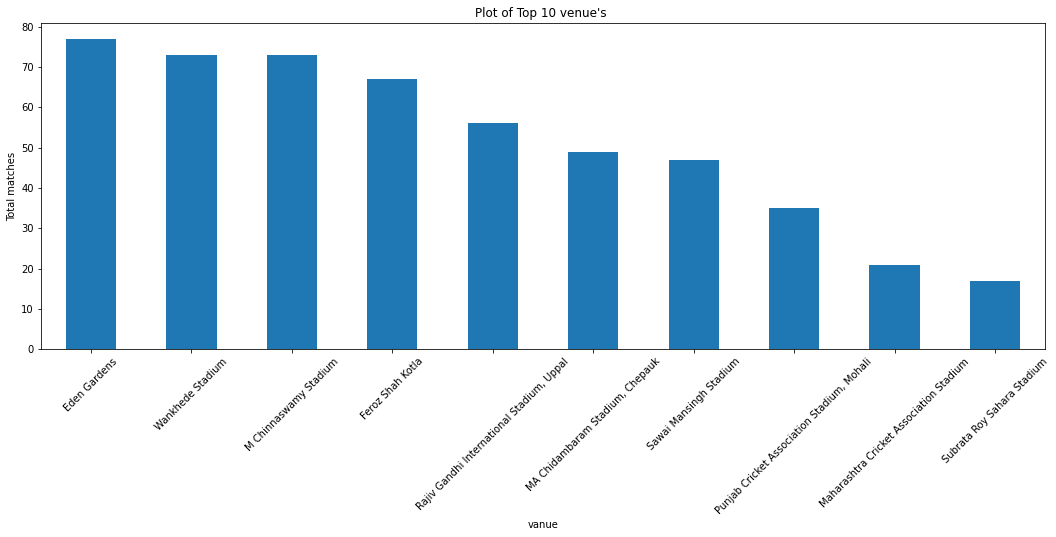

In [21]:
plt.figure(figsize=(18,6))
((matches_data['venue'].value_counts())[:10]).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Plot of Top 10 venue\'s ')
plt.xlabel('vanue')
plt.ylabel("Total matches")
plt.show()

#Conclusions


1.   Most number of Matches was played in 2013 followed by 2012 and 2011
2.   Most matches are won by Mumbai Indians followed by Chennai Super Kings
3.   Mumbai Indians is the most sucessful team as it won 4 ipl out of 12
4.   V kohli is the leading scorer in ipl followed by SK Raina and RG sharma.
5.   The highest number of four hit by player is Shikar Dhawan.
6.   The highest number of six hit by player is CH gayle.
7.   Player with greatest contribution in match winning is CH Gayle followed by AB de Villers.
8.   Highest Wicket Taker is SL Malinga
9.   It was found out that most dismissal were in the form of caught out(60.54%).
10.  It was found out that team which has won the toss has won more games(52%)
11.  It was found out that most team after winning toss chooses to filed first(61.2%).
12.  It was found out that team which bowls first wins(55.4%) more games than team which bat first.But suprisingly in 2010 and 2015 the team with batting first has more wins.
13.  It is interesting that 75% times the team that won the toss was also the winner of IPL.
14.  Very much suprisingly that in finals team who batted first has won 66.7% games.
15.  Most number of matches were held in city Mumbai.
16.  Suprisingly Eden Gardens(Kolkata stadium) is the venue where most matches were held because Mumbai city has two stadium Wankhede and DY patil stadium.